In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Задание (вариант №17)**.

Построить численную интерполяцию функции $y = f(x)$ на отрезке $x \in [a, b]$, в точках $x^{\star} \in [a, b]$ не совпадающих с узлами интерполяции, используя интерполяционный полином Лагранжа. В качестве $x^{\star}$ выбрать середины отрезков между интерполяционными узлами. В качестве узлов интерполяции по пространственной переменной $x$ использовать:

(a) - равномерный шаг $h$ между узлами

(b) - узлы Чебышева

$$f(x) = \frac{1}{2} \ln(x + 2) \sin(\frac{x}{2}), \quad x \in [0, 10]$$

# Общие функции

In [ ]:
a, b = 0, 10


def f(x):
    x = np.asarray(x, dtype=float)
    return 0.5 * np.log(x + 2.0) * np.sin(x / 2.0)

In [ ]:
def lagrange_interpolation(x_nodes, x):
    y_nodes = f(x_nodes)

    result = np.zeros(len(x), dtype=float)
    for i in range(len(x_nodes)):
        l = np.ones(len(x), dtype=float)
        for j in range(len(x_nodes)):
            if i == j:
                continue
            l *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += y_nodes[i] * l
    return result

In [ ]:
def check_points(x_nodes):
    return (x_nodes[:-1] + x_nodes[1:]) / 2.0

## (a) - равномерный шаг $h$ между узлами

In [ ]:
def uniform_nodes(n):
    return np.linspace(a, b, n)

## (b) - узлы Чебышева

In [ ]:
def chebyshev_nodes(n):
    return (a + b) / 2.0 + ((a - b) / 2.0) * np.cos((2.0 * np.arange(n) + 1.0) / (2.0 * n) * np.pi)

# Анализ

In [ ]:
def analyze(x_nodes):
    plt.figure(figsize=(7, 4))
    plt.xlim(a, b)
    plt.xlabel("x")
    plt.ylabel("f(x)")

    x = np.linspace(a, b, 1000)
    y = f(x)
    plt.plot(x, y, color="red", linewidth=3, label="Исходная функция")

    x_interpolation = check_points(x_nodes)
    y_interpolation = lagrange_interpolation(x_nodes, x_interpolation)
    plt.plot(x_interpolation, y_interpolation, color="blue", linewidth=3, linestyle="--", label="Результат интерполяции")
    plt.scatter(x_interpolation, y_interpolation, color="blue", s=22)
    plt.plot([a, x_interpolation[0]], [f(a), y_interpolation[0]], color="blue", linewidth=3, linestyle='--')
    plt.plot([x_interpolation[-1], b], [y_interpolation[-1], f(b)], color="blue", linewidth=3, linestyle='--')
    plt.legend()
    #plt.grid(True, alpha=0.3)
    #plt.tight_layout()
    plt.show()

    max_error = float(np.max(np.abs(f(x_interpolation) - y_interpolation)))
    print(f"Максимальная ошибка интерполяции равна {max_error:.6e}")
    return max_error


In [ ]:
n_nodes = [2, 5, 10, 25, 50, 60, 65, 100]

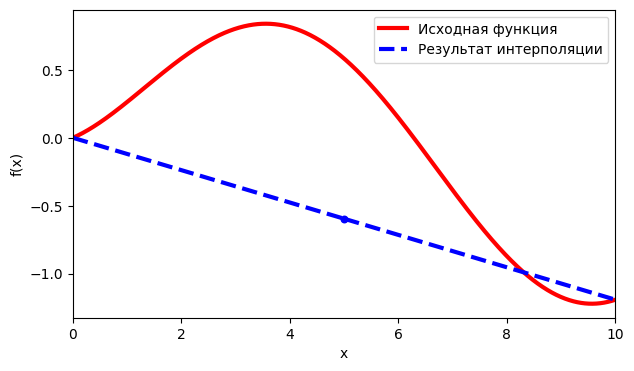

Максимальная ошибка интерполяции равна 1.177996e+00


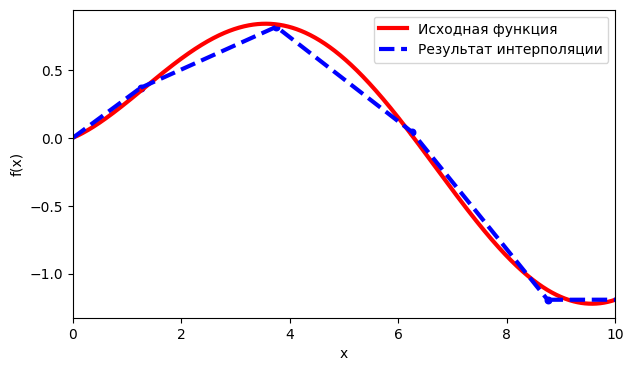

Максимальная ошибка интерполяции равна 7.128570e-02


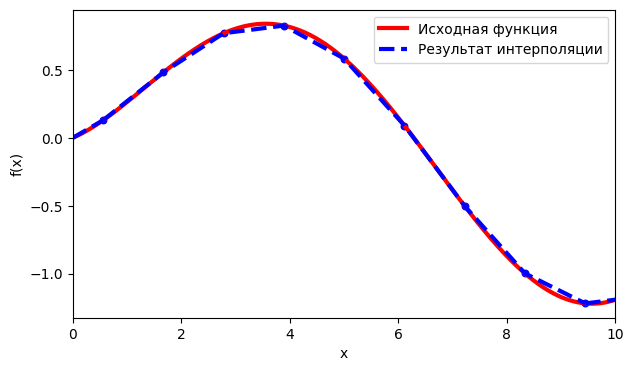

Максимальная ошибка интерполяции равна 7.520873e-05


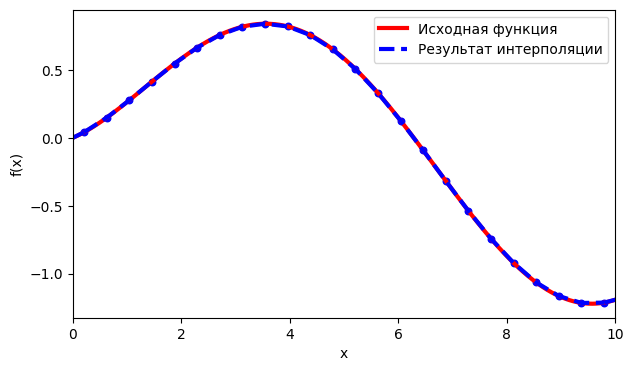

Максимальная ошибка интерполяции равна 5.913862e-09


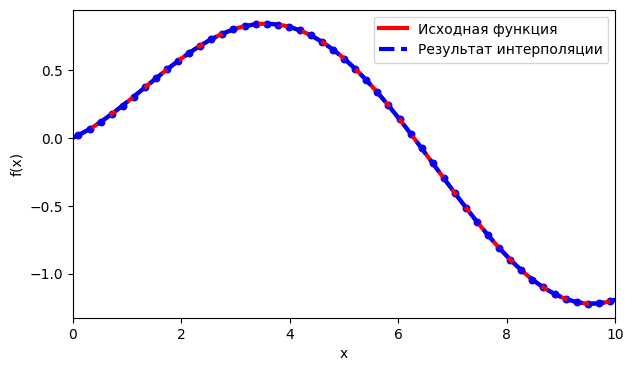

Максимальная ошибка интерполяции равна 1.572006e-04


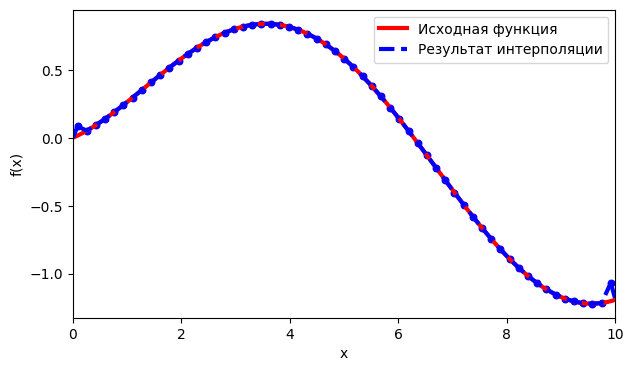

Максимальная ошибка интерполяции равна 1.339184e-01


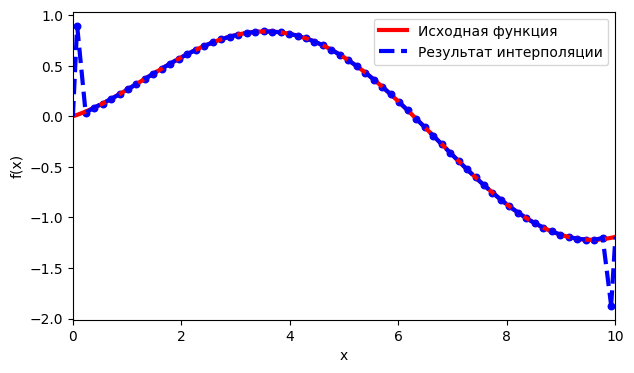

Максимальная ошибка интерполяции равна 8.812391e-01


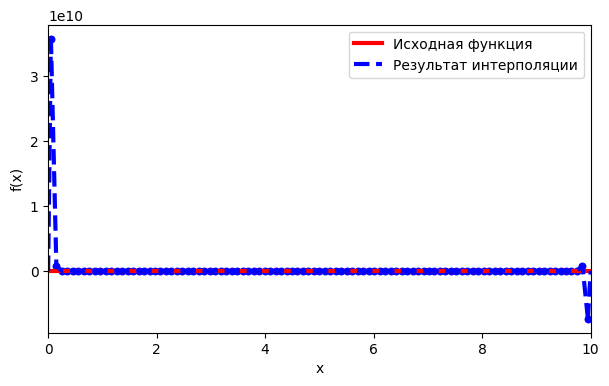

Максимальная ошибка интерполяции равна 3.566995e+10


In [ ]:
uniform_errors = [0] * len(n_nodes)
for i, n in enumerate(n_nodes):
    uniform_errors[i] = analyze(uniform_nodes(n))

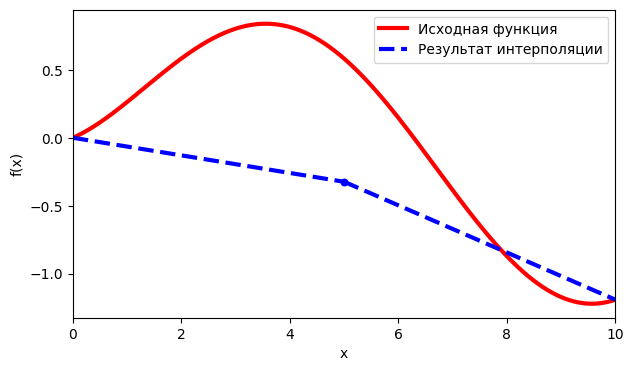

Максимальная ошибка интерполяции равна 9.060662e-01


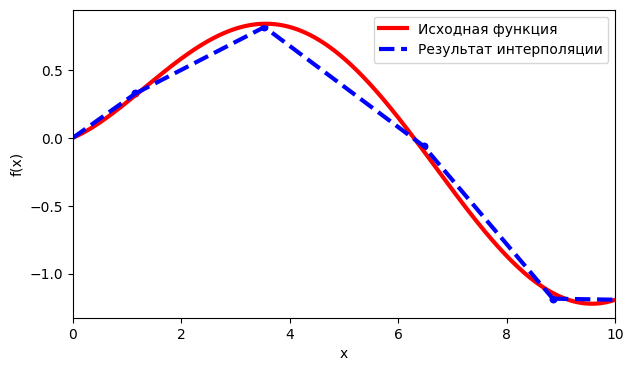

Максимальная ошибка интерполяции равна 4.133867e-02


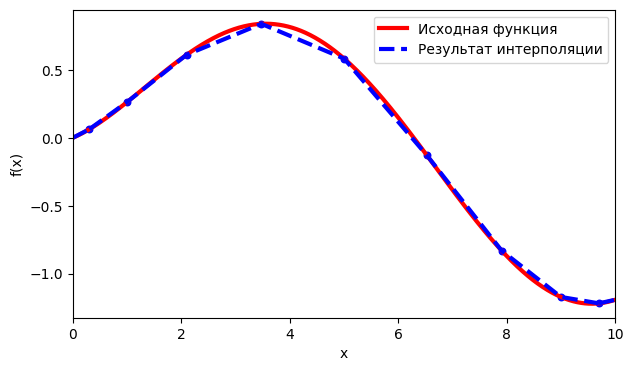

Максимальная ошибка интерполяции равна 2.263790e-05


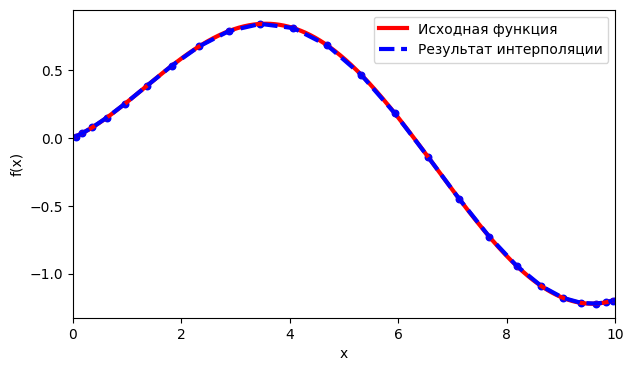

Максимальная ошибка интерполяции равна 2.943814e-11


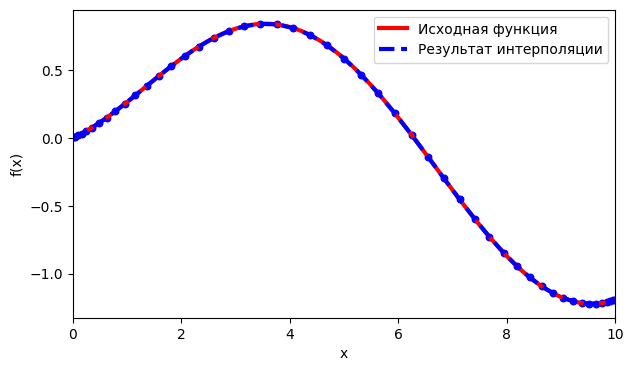

Максимальная ошибка интерполяции равна 1.332268e-15


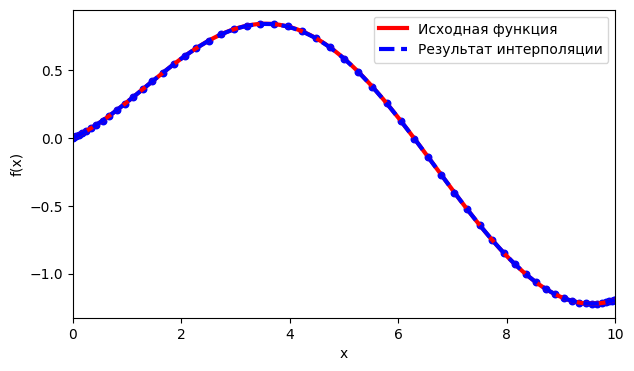

Максимальная ошибка интерполяции равна 2.220446e-15


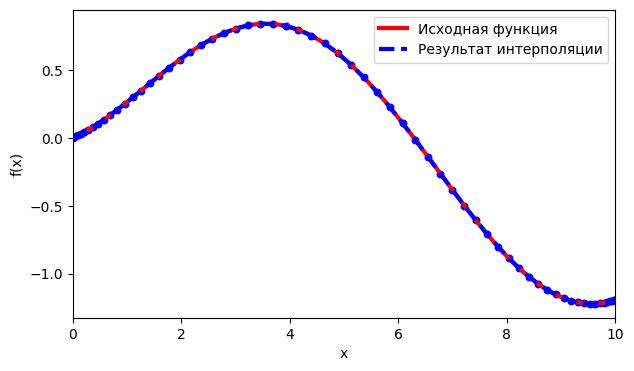

Максимальная ошибка интерполяции равна 1.665335e-15


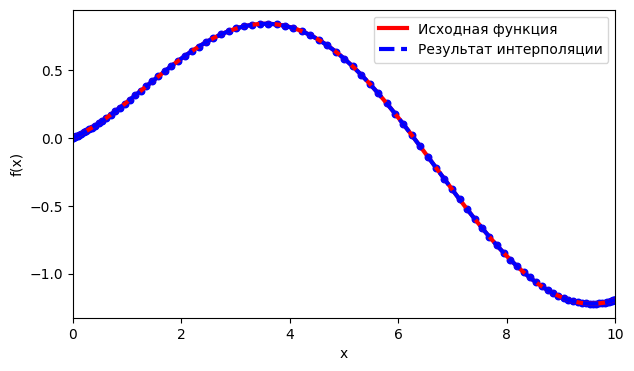

Максимальная ошибка интерполяции равна 2.664535e-15


In [ ]:
chebyshev_errors = [0] * len(n_nodes)
for i, n in enumerate(n_nodes):
    chebyshev_errors[i] = analyze(chebyshev_nodes(n))

In [ ]:
errors_diff = list(map(lambda err: err[0] - err[1], zip(uniform_errors, chebyshev_errors)))
print(errors_diff)  # Положительность означает, что uniform_error > chebyshev_error

[0.27192965720886364, 0.02994703433867718, 5.2570825032863255e-05, 5.884423816271411e-09, 0.0001572006384090649, 0.13391844543128495, 0.8812391435341774, 35669946895.90476]


Итоги анализа:
* видно, что с большим количеством узлов интерполяции ошибки обоих методов уменьшаются (**исключение** - интерполяция с равномерным шагом начиная с 50 узлов начинает резкий рост погрешности, т.е. наблюдается *феномен Рунге*; интерполяция с узлами Чебышева такой проблемой не страдает)
* узлы Чебышева показывают себя лучше узлов равномерного шага - на всех количествах узлов максимальная ошибка узлов равномерного шага выше